In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.convolution import Box1DKernel, convolve
from scipy.signal import savgol_filter

%matplotlib widget

In [2]:
'''
Creates the filename and extracts  and caliberates information from the primary HDU. 
The flux caliberated 1D spectrum is row 1 (python row 0) and sky spectrum 
is row 2 (python row 1) of the fits file.
Each fits file has 4 rows (rows 3 and 4 are the uncertainty and mask).
'''

dir_path = "/Users/neelsharma/Desktop/ASTRProjects/G165/MMT/short_exposure_2024.0113/obj_abs_1D/"

slit = "slitB055_SDSSJ112738.41+421717.7t100770.fits"

filename = dir_path + "/" + slit

x, header = fits.getdata(filename, header = True)

hdul = fits.open(filename)
image_data = hdul[0].data
skysub = image_data[0]
sky = image_data[1]

wv = header["CRVAL1"] + header["CDELT1"]*np.arange(header["NAXIS1"])

#Cut off at 32.5 

In [3]:
'''
A dictionary of all the line features and their occurences at 1 or more wavelengths.
'''

l_dict = {'Lylim': [912], 
            'Lyb': [1026], 
            'Lya': [1215.67], 
            'NV': [1240], 
            'SiII': [1260, 1527], 
            'CIII/SiIII': [1296.3], 
            'CII/NIII': [1323.9], 
            'SiII/OI': [1302], 
            ' ': [1304, 1403, 1550, 2799, 3970, 5167, 5184], 
            'CII': [1335, 2326], 
            'OIV': [1343.354], 
            'SiIV': [1394], 
            'SiIII': [1417.237], 
            'CIII': [1427.85, 1909], 
            'SV': [1501.76], 
            'CIV': [1548], 
            'FeII': [1608, 2344, 2374, 2587], 
            'HeII': [1640], 
            'AlII': [1671], 
            'AlIII': [1855], 
            '.': [1863, 2600, 5889, 5896, 6583, 6730], 
            'NeIV': [2424], 'MgII': [2796], 
            'NeV': [3346, 3426], 
            '[OII]': [3727], 
            'Hth': [3798], 
            'Heta': [3835], 
            'Hz': [3889], 
            'K': [3933], 
            'H,Hep': [3968], 
            'Hd': [4102], 
            'Gb': [4304], 
            'Hg': [4340], 
            'Hb': [4861], 
            '[OIII]': [4959, 5007], 
            'MgI': [5173], 
            'HeI,NaD': [5876], 
            'NII': [6548], 
            'Ha': [6563], 
            'SII': [6716], 
            'TiO': [7040], 
            'HeI': [7065.3], 
            'KI': [7680], 
            'NaI': [8190], 
            'Cs': [8520]}

In [4]:
'''
Applying boxcar filter to reduce noise in both, the reduced and sky spectra.
'''

boxcar = Box1DKernel(21)
skysub_box = convolve(skysub, boxcar)
sky_box = convolve(sky, boxcar)

In [5]:
'''
Applying a redshift to both spectra.
'''

zed = 0.0053 # arc11 at 4.13

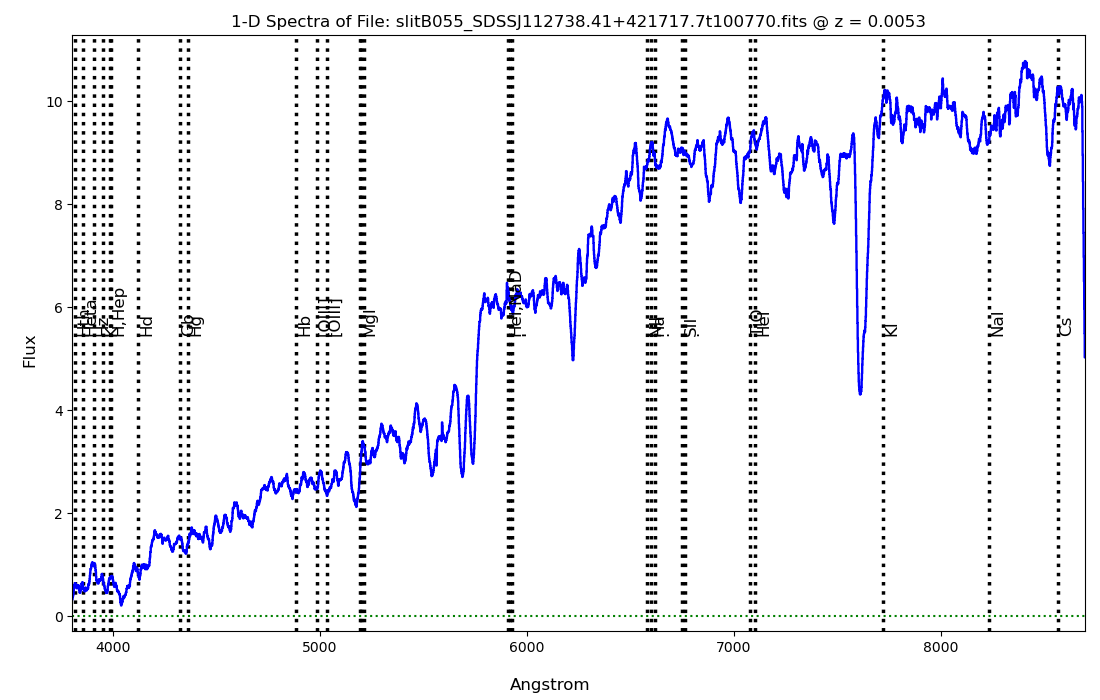

In [6]:
'''
Plots the reduced 1D spectrum.
'''

fig, axs = plt.subplots(1, sharex=True, figsize=(11,7)) 

axs.set_xlim(np.min(wv), np.max(wv)) 

ymin_skysub = np.min(skysub_box) - 0.5
ymax_skysub = np.max(skysub_box) + 0.5
axs.set_ylim(ymin_skysub, ymax_skysub) # if needed, change flux limits manually here

yann = (ymax_skysub+ymin_skysub)/2
yann2 = (ymax_skysub+ymin_skysub)/2
label_placement = (ymax_skysub+ymin_skysub)/2
xoffs = 5

for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        axs.axvline(x=lf, color='black',lw=2.5,ls=':')
        axs.annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=12)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            axs.axvline(x=lf, color='black',lw=2.5,ls=':')
            axs.annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=12)
    
#skylines = [5577, 5895, 6301, 6875, 7246, 7600]
#for i in skylines:
#    axs.axvline(x=i, color='green',lw=2,ls='-')
#    axs.annotate('Skyline',(i,yann2),xytext=(i-xoffs,label_placement),rotation=90,clip_on=True, fontsize=12)

plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 12)
fig.supylabel('Flux', fontsize = 12) 
plt.title("1-D Spectra of File: " + slit + ' @ z = ' + str(zed))

axs.plot(wv, skysub_box, drawstyle='steps', color='blue', linewidth=1.7)
#axs.plot(wv_1, skysub_box_1, drawstyle='steps', color='red', linewidth=1.7)

plt.tight_layout()
plt.show()

#cluster redshift = 0.35

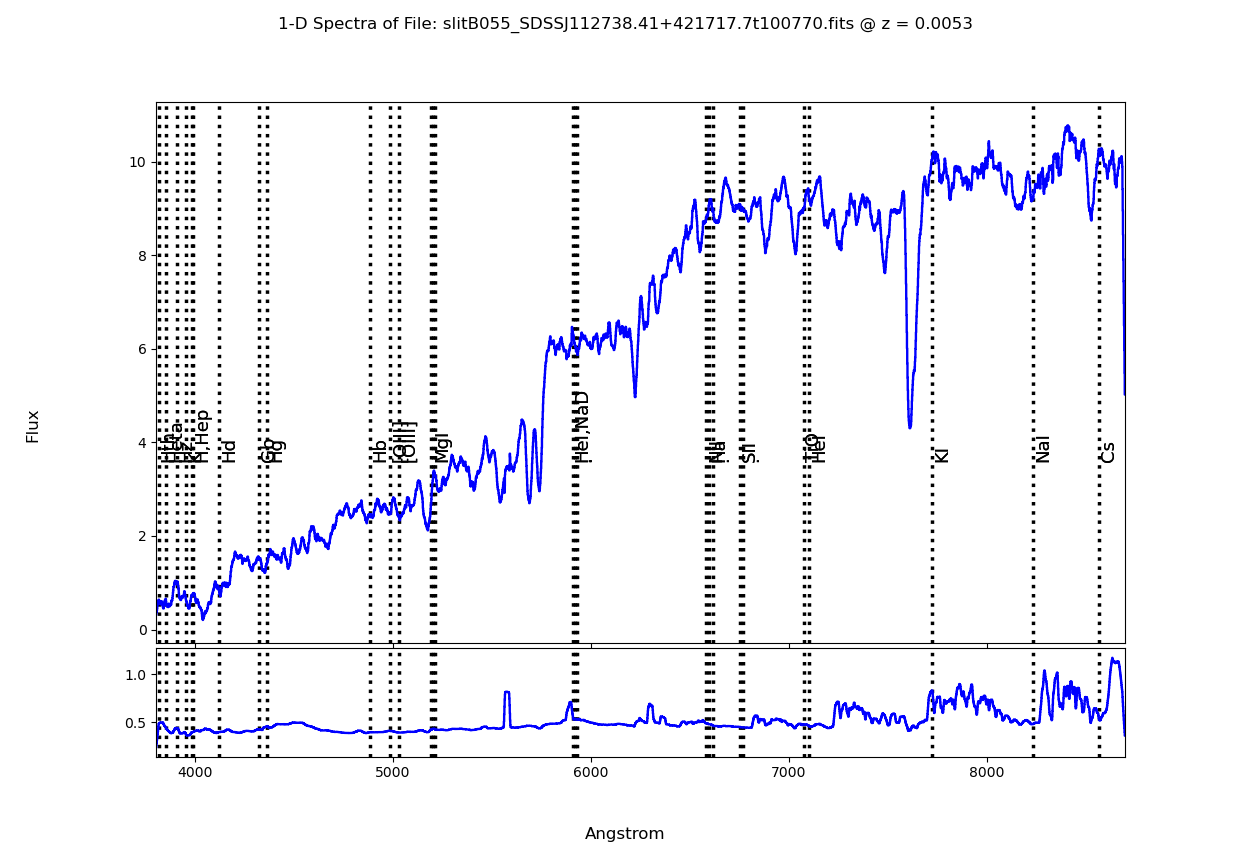

In [7]:
'''
Plots the reduced 1D spectrum against the sky spectrum in graphs 1 and 2 (axs[0] and axs[1]) respectively.
'''

fig, axs = plt.subplots(2, sharex=True,gridspec_kw={'height_ratios': [5,1],'hspace': 0.015}, figsize=(12.5,8.5)) 
plt.suptitle("1-D Spectra of File: " + slit + ' @ z = ' + str(zed))

ymin_skysub = np.min(skysub_box) - 0.5
ymax_skysub = np.max(skysub_box) + 0.5

axs[0].set_ylim(ymin_skysub, ymax_skysub)
axs[1].set_ylim(np.min(sky_box) - 0.1, np.max(sky_box) + 0.1)

for num in range(0,2):
    axs[num].set_xlim(np.min(wv), np.max(wv))

yann = (ymax_skysub+ymin_skysub)/3
yann2 = (ymax_skysub+ymin_skysub)/3
label_placement = (ymax_skysub+ymin_skysub)/3
xoffs = 5

for key in l_dict.keys():
    if len(l_dict[key]) == 1:
        lf = l_dict[key][0] * (1+zed)
        for num in range(0,2):
            axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
            axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    else:
        for i in range(len(l_dict[key])):
            lf = l_dict[key][i] * (1+zed)
            for num in range(0,2):
                axs[num].axvline(x=lf, color='black',lw=2.5,ls=':')
                axs[0].annotate(key,(lf,yann),xytext=(lf+xoffs, label_placement),rotation=90,clip_on=True, fontsize=13)
    
#for i in skylines:
#skylines = [5577, 5895, 6301, 6875, 7246, 7600]
#    for num in range(0,2):
#        axs[num].axvline(x=i, color='green',lw=2,ls='-')
#        axs[0].annotate('Skyline',(i,yann2),xytext=(i-xoffs,label_placement),rotation=90,clip_on=True, fontsize=13)

plt.axhline(0, color='green', ls = ":")

fig.supxlabel('Angstrom', fontsize = 12)
fig.supylabel('Flux', fontsize = 12) 

axs[0].plot(wv, skysub_box, drawstyle='steps', color='blue', linewidth=1.7)
axs[1].plot(wv, sky_box, drawstyle='steps', color='blue', linewidth=1.7)

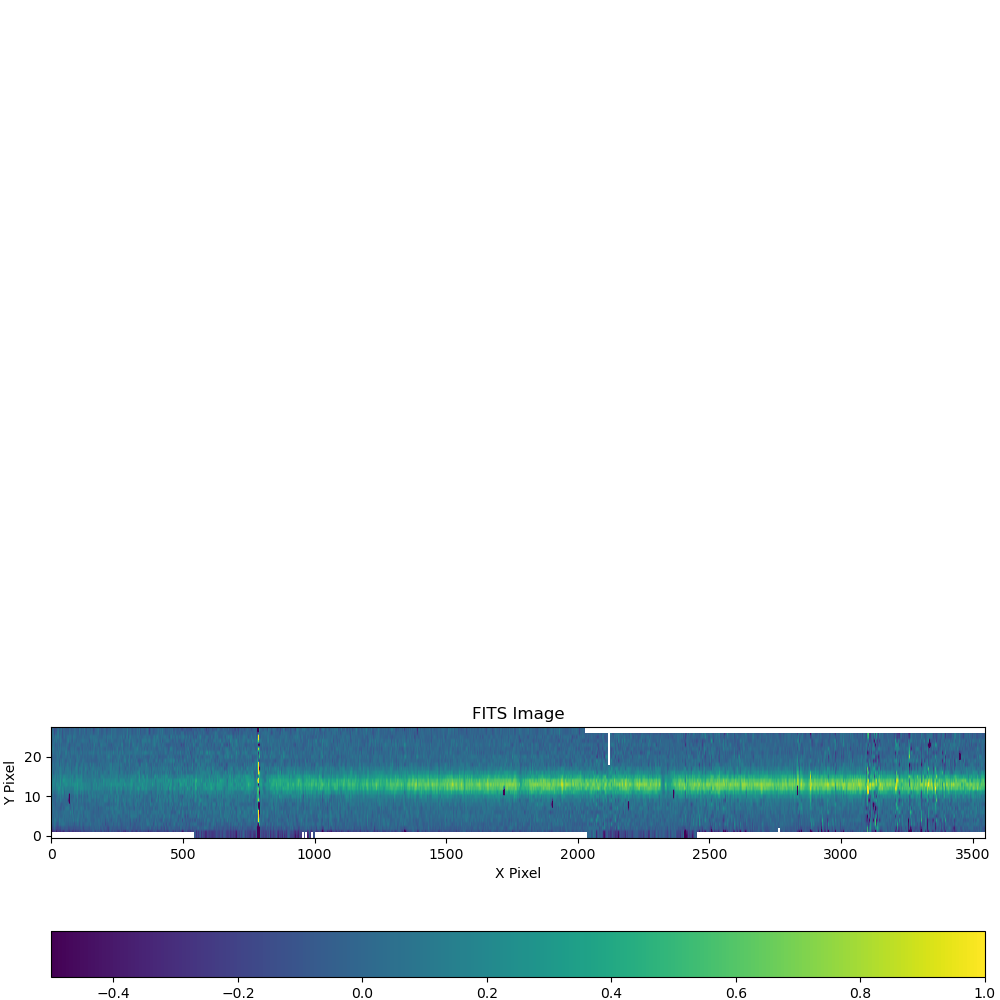

In [8]:
# need OBJECT name
TARGETNUM = header.get('SLITID', 'Unknown')

cube_file = '/Users/neelsharma/Desktop/ASTRProjects/G165/MMT/obj_abs_slits_lin.fits'

with fits.open(cube_file) as hdul:
    data = hdul[TARGETNUM].data

vmin = -0.5
vmax = 1

# Identify rows and columns that are entirely NaN
non_nan_rows = ~np.isnan(data).all(axis=1)  # Rows that are not all NaN
non_nan_cols = ~np.isnan(data).all(axis=0)  # Columns that are not all NaN

# Slice the data for plotting, removing only-NaN rows and columns
plot_data = data[non_nan_rows][:, non_nan_cols]

plt.figure(layout='constrained', figsize=(10, 10))
plt.imshow(plot_data, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(orientation='horizontal')
plt.gca().set_aspect(15)
plt.title('FITS Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()